In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# disable spontaneous breathing
neo.model.models["Breathing"].breathing_enabled = False

# configure the ventilator
neo.model.models["Ventilator"].vent_mode = "PRVC"
neo.model.models["Ventilator"].pip_cmh2o_max = 20.0
neo.model.models["Ventilator"].peep_cmh2o = 3.0
neo.model.models["Ventilator"].tidal_volume = 0.015
neo.model.models["Ventilator"].vent_rate = 5.0
neo.model.models["Ventilator"].insp_flow = 12.0

# turn on the ventilator
neo.model.models["Ventilator"].switch_ventilator(True)

# stabilize by calculating 120 seconds
neo.fastforward(60)

0.013674875137027198
0.019441942280900713
0.018346933783833695
0.017099408159931696
Ready in 3.3 sec. Average model step in 0.0275 ms.


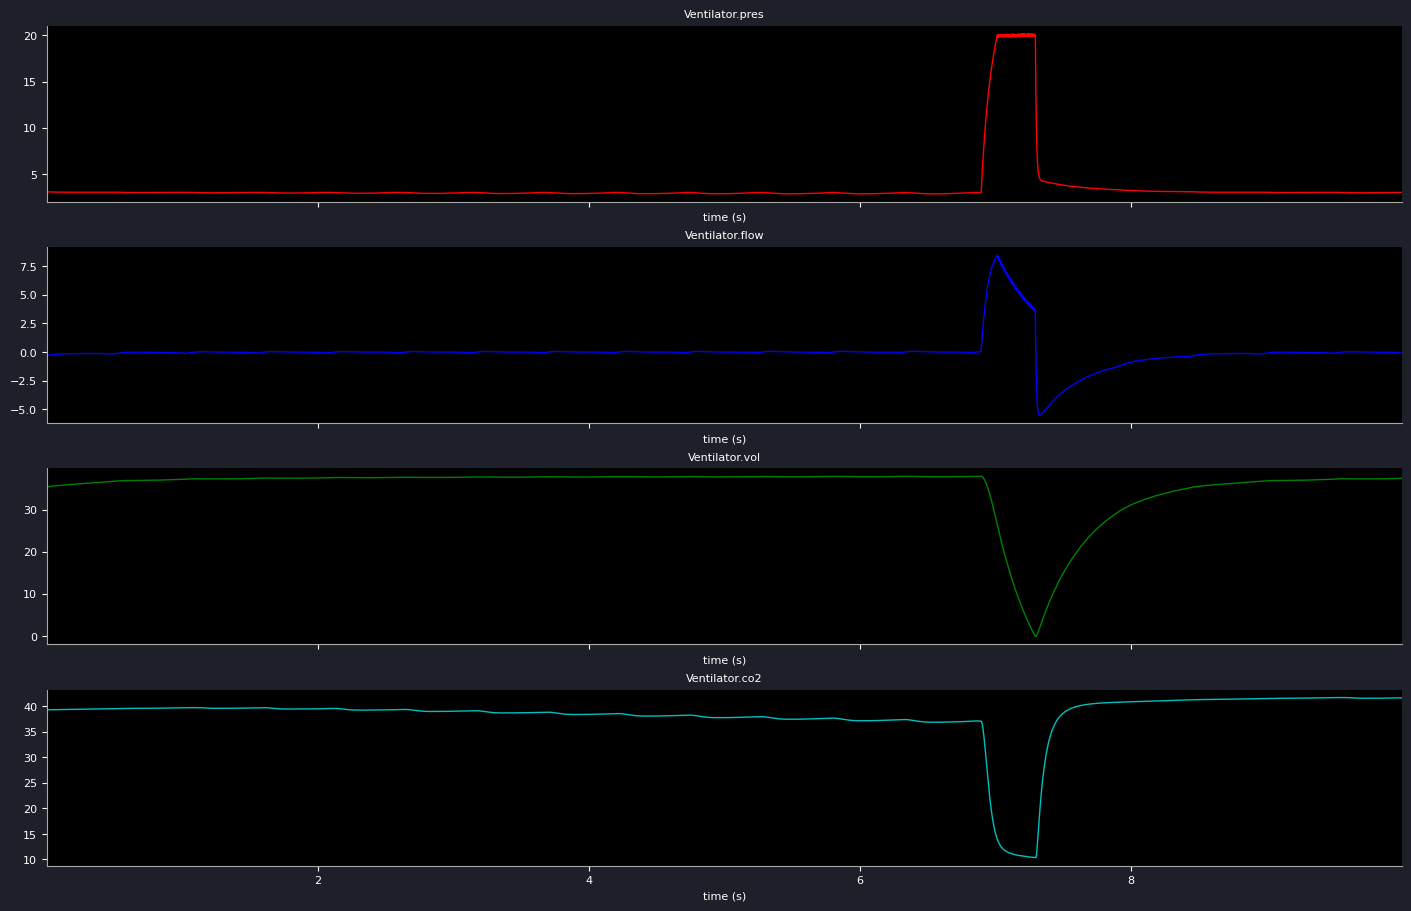

In [13]:
neo.plot_ventilator_curves(time_to_calculate=10)

In [14]:
neo.get_vitals()


AA.pres         : max   67.59003, min   41.95066 mmHg
PA.pres         : max   38.75048, min    19.4458 mmHg
IVCI.pres       : max    4.18263, min    3.36866 mmHg


{'heartrate': 113.9515918896968,
 'spo2_pre': 95.33024203313464,
 'abp_systole': 67.59003,
 'abp_diastole': 41.95066,
 'pap_systole': 38.75048,
 'pap_diastole': 19.4458,
 'cvp': 3.639956201,
 'resp_rate': 0.0,
 'pH': 7.36592036782734,
 'po2': 75.5563653315943,
 'pco2': 46.11163145309173,
 'hco3': 26.088231042522878,
 'be': 0.08058215653821973}

In [16]:
neo.analyze(["Ventilator.exp_tidal_volume"], time_to_calculate=20)


Ventilator.exp_tidal_volume: max    0.03883 min       -0.0


{}

In [5]:
neo.analyze(["Breathing.exp_tidal_volume"], time_to_calculate=20)


Breathing.exp_tidal_volume: max       -0.0 min       -0.0


{}

In [15]:
neo.model.models["Ventilator"].pip_cmh2o

20.0

0.038832587948503465
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0

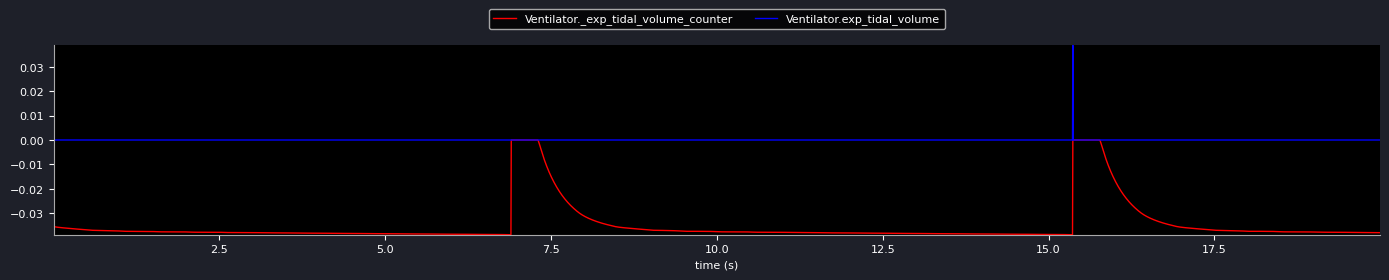


Ventilator._exp_tidal_volume_counter: max        0.0 min   -0.03883
Ventilator.exp_tidal_volume: max    0.03883 min       -0.0


In [2]:
neo.plot_time_graph(["Ventilator._exp_tidal_volume_counter", "Ventilator.exp_tidal_volume"], time_to_calculate=20, fill=False)